# Configs


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform
import ast
import matplotlib.animation as animation

PROJ_DIR = os.environ.get("PROJ_DIR")
if PROJ_DIR is None:
    if platform.system() == "Linux":
        PROJ_DIR = "/home/albuquerque/espy-user-mobility"
    else:
        PROJ_DIR = "/Users/paulo/Developer/python/espy-user-mobility"
if not os.path.exists(PROJ_DIR):
    raise FileNotFoundError(f"Project dir not found: {PROJ_DIR}")

DIR_SUFFIX = os.environ.get("DIR_SUFFIX")
if DIR_SUFFIX is None:
    DIR_SUFFIX = input("Enter a suffix for the directories, e.g '/0.6dist-16migr-50steps/2024-11-27_14-23-33': ")

LOGS_DIR = f"{PROJ_DIR}/logs{DIR_SUFFIX}"
PLOTS_DIR = f"{PROJ_DIR}/espy_user_mobility/espy-notebooks/plots{DIR_SUFFIX}"
os.makedirs(PLOTS_DIR, exist_ok=True)

if not os.path.exists(LOGS_DIR):
    raise FileNotFoundError(f"Logs dir not found: {LOGS_DIR}")

print(f"Logs dir: {LOGS_DIR}")
print(f"Plots dir: {PLOTS_DIR}")

DAY_START_IN_MINUTES = 5 * 60
DAY_END_IN_MINUTES = 23 * 60
DAY_CYCLE_IN_MINUTES = DAY_END_IN_MINUTES - DAY_START_IN_MINUTES

SHOW_PLOTS = True
if platform.system() == "Linux":
    SHOW_PLOTS = False


def step_to_datetime(step: int) -> str:
    """Converts a step to a datetime string."""
    time_of_day_in_minutes = step % DAY_CYCLE_IN_MINUTES + DAY_START_IN_MINUTES
    hours = time_of_day_in_minutes // 60
    minutes = time_of_day_in_minutes % 60
    return (
        f"Step {step:05d} "
        + f"Time: {hours:02d}:{minutes % 60:02d} "
        + f"Day: {time_of_day_in_minutes // DAY_CYCLE_IN_MINUTES + 1} "
    )


Logs dir: /Users/paulo/Developer/python/espy-user-mobility/logs/0.6dist-16migr-50steps/2024-11-27_14-23-33
Plots dir: /Users/paulo/Developer/python/espy-user-mobility/espy_user_mobility/espy-notebooks/plots/0.6dist-16migr-50steps/2024-11-27_14-23-33


# Edge/Cloud Server


In [2]:
df_edge_server = pd.read_csv(f"{LOGS_DIR}/EdgeServer.csv")
df_edge_server

,Object,Time Step,Instance ID,Coordinates,Available,Model Name,CPU,RAM,Disk,CPU Demand,RAM Demand,Disk Demand,Resources Score,Ongoing Migrations,Services,Power Consumption
0,EdgeServer_1,0,1,"[209, 109]",True,CLOUD,480,4398046,17592186,0,0,7,1.0,0,[],1000.0
1,EdgeServer_2,0,2,"[211, 109]",True,CLOUD,480,4398046,17592186,0,0,0,1.0,0,[],1000.0
2,EdgeServer_3,0,3,"[210, 110]",True,CLOUD,480,4398046,17592186,0,0,0,1.0,0,[],1000.0
3,EdgeServer_4,0,4,"[212, 110]",True,CLOUD,480,4398046,17592186,0,0,0,1.0,0,[],1000.0
4,EdgeServer_5,0,5,"[53, 55]",True,SGI,32,32768,1048576,0,0,0,1.0,0,[],265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,EdgeServer_90,50,90,"[94, 22]",True,Acer,48,65536,1048576,0,0,0,1.0,0,[],127.0
4790,EdgeServer_91,50,91,"[109, 15]",True,Acer,48,65536,1048576,0,0,0,1.0,0,[],127.0
4791,EdgeServer_92,50,92,"[130, 62]",True,Acer,48,65536,1048576,0,0,0,1.0,0,[],127.0
4792,EdgeServer_93,50,93,"[59, 49]",True,Acer,48,65536,1048576,0,0,0,1.0,0,[],127.0


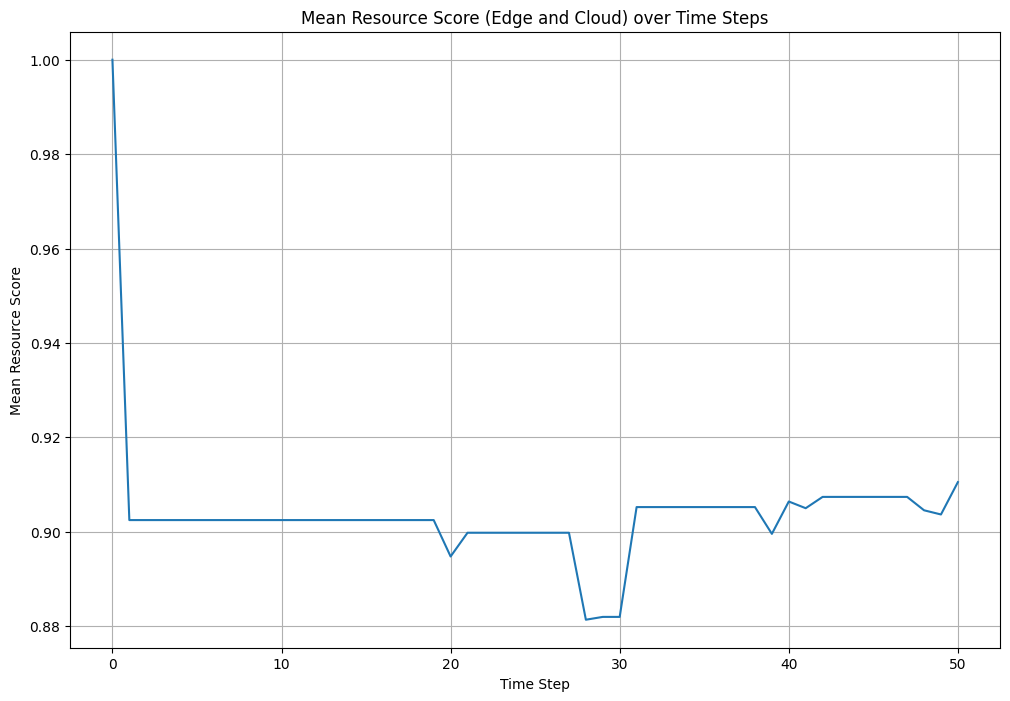

<Figure size 640x480 with 0 Axes>

In [3]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score_edge_cloud = df_edge_server.groupby("Time Step")["Resources Score"].mean()

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8))
plt.plot(mean_resource_score_edge_cloud.index, mean_resource_score_edge_cloud.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score (Edge and Cloud) over Time Steps")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_edge_cloud.png")

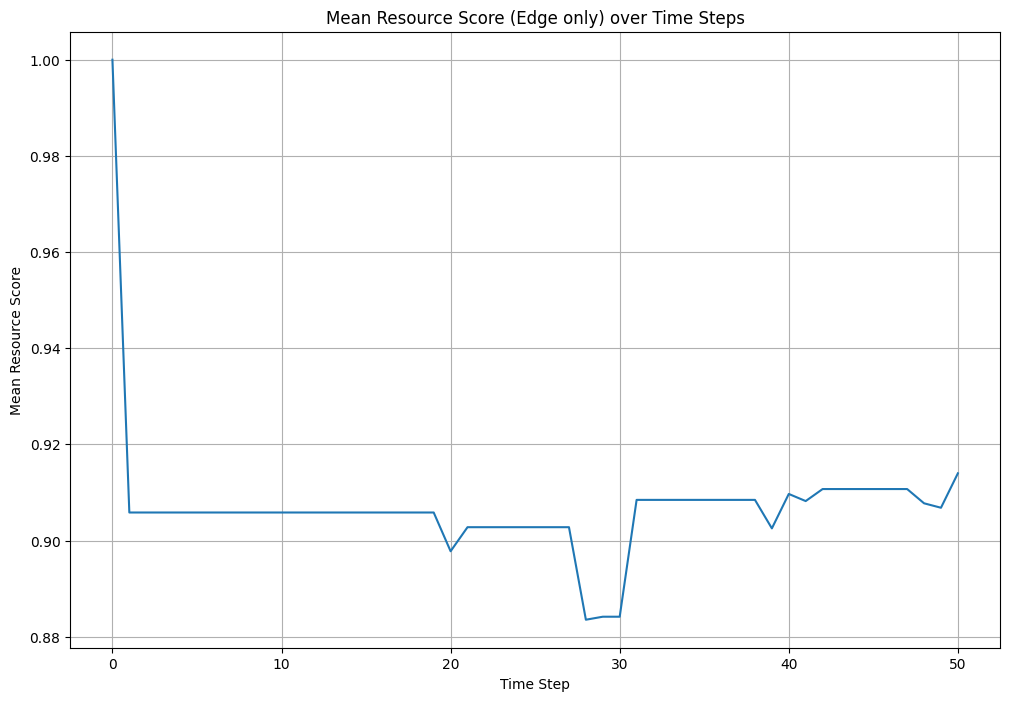

<Figure size 640x480 with 0 Axes>

In [4]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score_edge_only = (
    df_edge_server[df_edge_server["Model Name"] != "CLOUD"].groupby("Time Step")["Resources Score"].mean()
)

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8))
plt.plot(mean_resource_score_edge_only.index, mean_resource_score_edge_only.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score (Edge only) over Time Steps")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_edge_only.png")

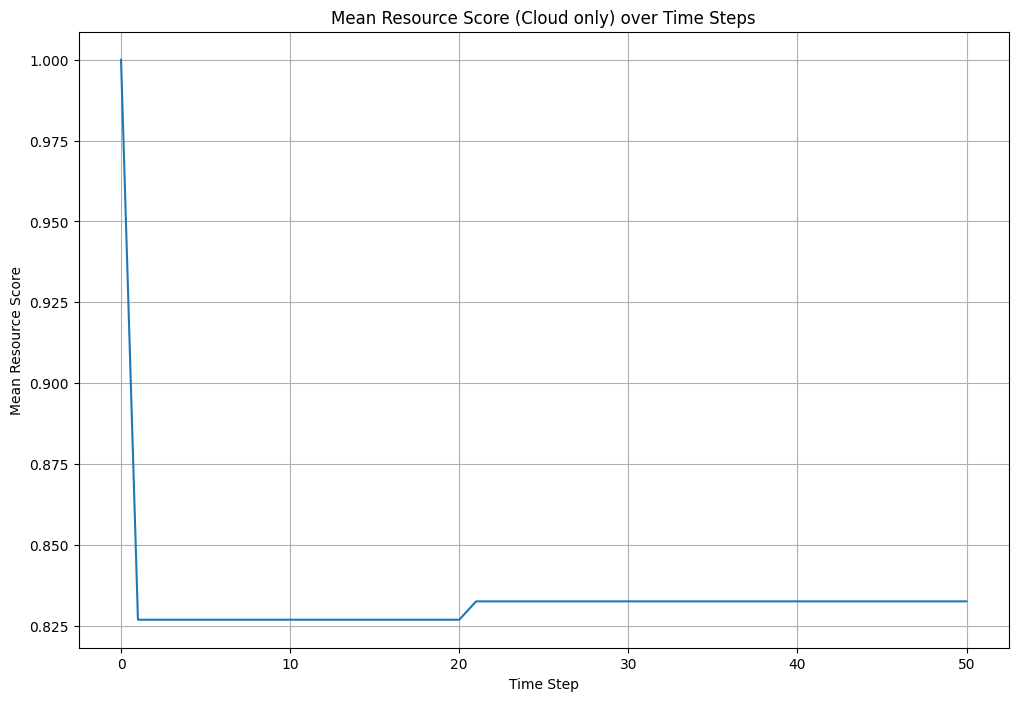

<Figure size 640x480 with 0 Axes>

In [5]:
# Calculate the mean of "Resource Score" for each "Time Step"
mean_resource_score_cloud_only = (
    df_edge_server[df_edge_server["Model Name"] == "CLOUD"].groupby("Time Step")["Resources Score"].mean()
)

# Plot the mean "Resource Score" over "Time Step"
plt.figure(figsize=(12, 8))
plt.plot(mean_resource_score_cloud_only.index, mean_resource_score_cloud_only.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score (Cloud only) over Time Steps")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_cloud_only.png")

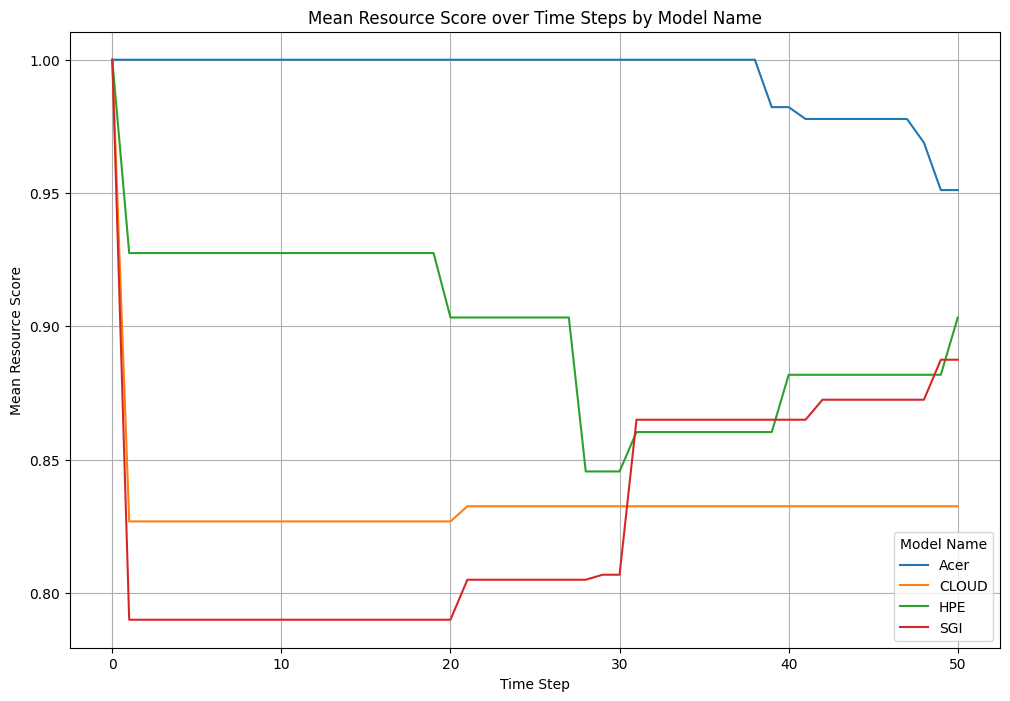

<Figure size 640x480 with 0 Axes>

In [6]:
# Calculate the mean "Resource Score" for each "Model Name" grouped by "Time Step"
mean_resource_score_model = df_edge_server.groupby(["Time Step", "Model Name"])["Resources Score"].mean().unstack()

# Plot the mean "Resource Score" for each "Model Name" over "Time Step"
plt.figure(figsize=(12, 8))
for model in mean_resource_score_model.columns:
    plt.plot(mean_resource_score_model.index, mean_resource_score_model[model], label=model)

plt.xlabel("Time Step")
plt.ylabel("Mean Resource Score")
plt.title("Mean Resource Score over Time Steps by Model Name")
plt.legend(title="Model Name")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_resource_score_by_model.png")

# Services


In [7]:
df_service = pd.read_csv(f"{LOGS_DIR}/Service.csv")
df_service

,Object,Time Step,Instance ID,Available,Server,Being Provisioned,Last Migration,Total Distance From Users
0,Service_1,0,1,False,NaN,False,NaN,0.000000
1,Service_2,0,2,False,NaN,False,NaN,0.000000
2,Service_3,0,3,False,NaN,False,NaN,0.000000
3,Service_4,0,4,False,NaN,False,NaN,0.000000
4,Service_5,0,5,False,NaN,False,NaN,0.000000
...,...,...,...,...,...,...,...,...
3055,Service_56,50,56,True,46.0,False,"{'status': 'finished', 'origin': 'None', 'targ...",0.503769
3056,Service_57,50,57,True,47.0,False,"{'status': 'finished', 'origin': 'None', 'targ...",0.483594
3057,Service_58,50,58,True,48.0,False,"{'status': 'finished', 'origin': 'None', 'targ...",0.482673
3058,Service_59,50,59,True,49.0,False,"{'status': 'finished', 'origin': 'None', 'targ...",0.464229


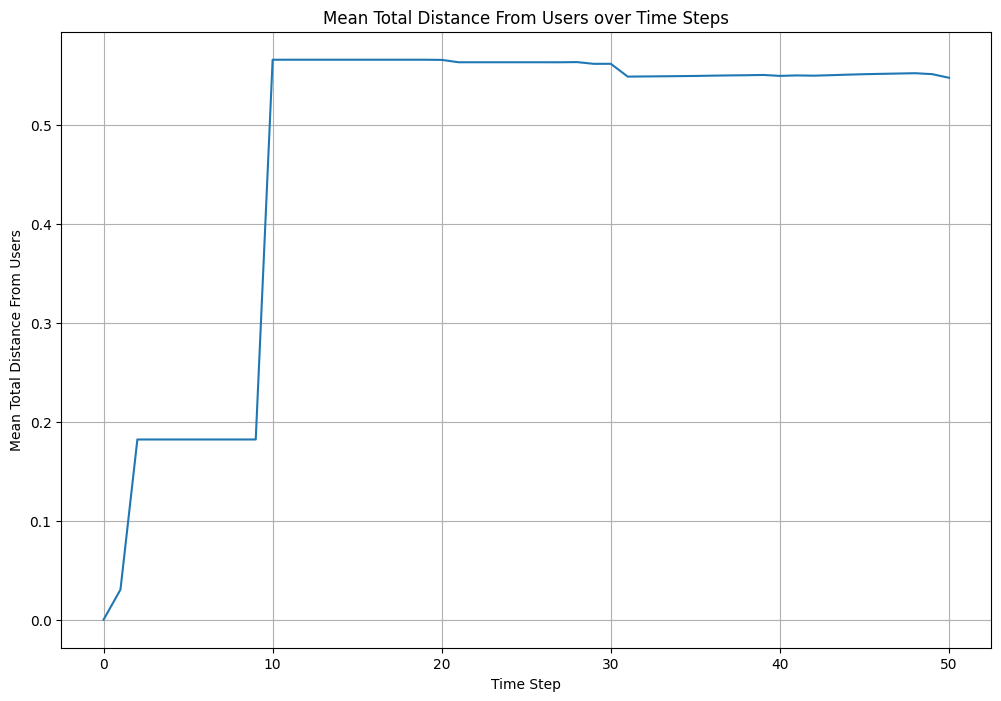

<Figure size 640x480 with 0 Axes>

In [8]:
# Calculate the mean "Total Distance From Users" for each "Time Step"
mean_service_distance_from_users = df_service.groupby("Time Step")["Total Distance From Users"].mean()

# Plot the mean "Total Distance From Users" over "Time Step"
plt.figure(figsize=(12, 8))
plt.plot(mean_service_distance_from_users.index, mean_service_distance_from_users.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Total Distance From Users")
plt.title("Mean Total Distance From Users over Time Steps")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_total_distance_from_users.png")

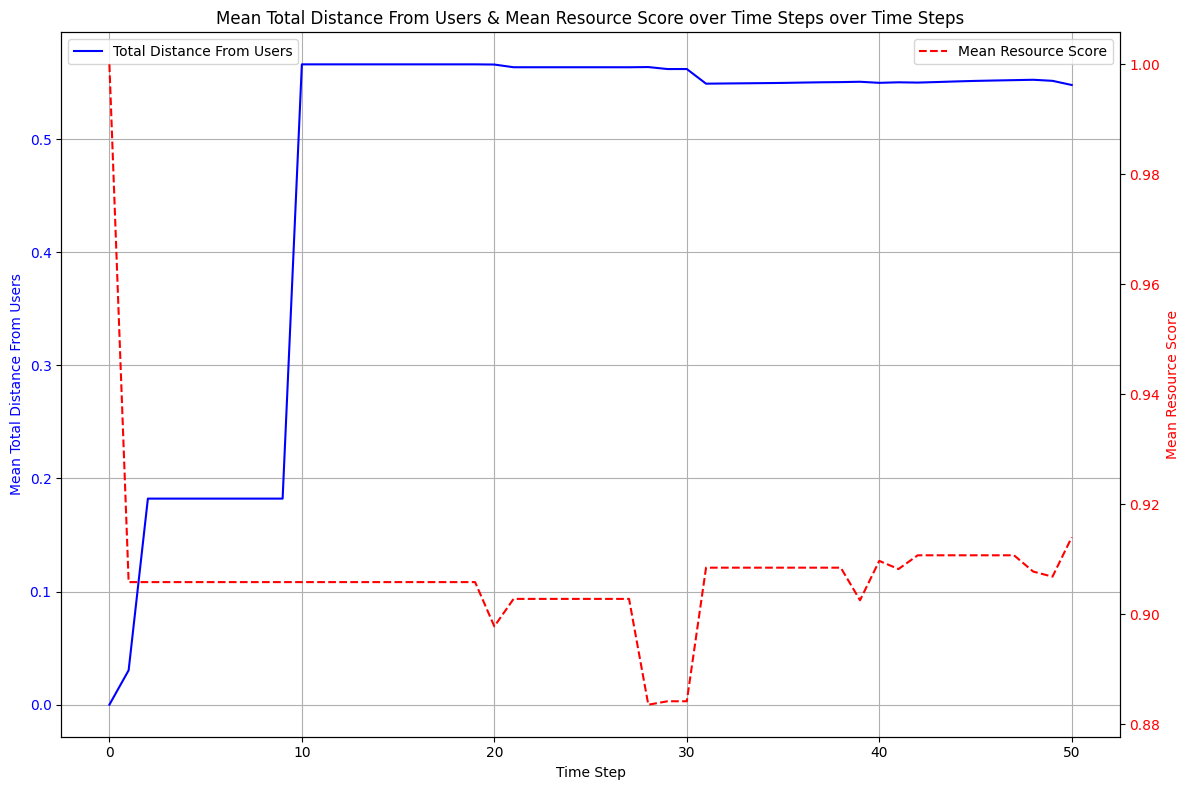

<Figure size 640x480 with 0 Axes>

In [9]:
# Sample data
x = np.linspace(0, 10, 100)  # X-axis values
y1 = np.sin(x)  # First Y-axis values
y2 = np.exp(0.3 * x)  # Second Y-axis values

# Create a figure and axis
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 8)

# Plot the first Y-axis
ax1.plot(mean_service_distance_from_users.index, mean_service_distance_from_users.values, "b-", label="Total Distance From Users")
ax1.set_xlabel("Time Step")
ax1.set_ylabel("Mean Total Distance From Users", color="b")
ax1.tick_params(axis="y", labelcolor="b")
ax1.grid(True)
ax1.legend(loc="upper left")

# Create a second Y-axis
ax2 = ax1.twinx()
ax2.plot(mean_resource_score_edge_only.index, mean_resource_score_edge_only.values, "r--", label="Mean Resource Score")
ax2.set_ylabel("Mean Resource Score", color="r")
ax2.tick_params(axis="y", labelcolor="r")
ax2.legend(loc="upper right")

# Show the plot
plt.title("Mean Total Distance From Users & Mean Resource Score over Time Steps over Time Steps")
plt.tight_layout()
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_total_distance_from_users_and_mean_resource_score.png")


# Users


In [10]:
df_user = pd.read_csv(f"{LOGS_DIR}/User.csv")
df_user["Coordinates"] = df_user["Coordinates"].apply(ast.literal_eval)
df_user.head()

,Object,Time Step,Coordinates,Point of Interest,Applications,Base Station,Delays,Communication Paths
0,User_1,0,"[66, 12]",NaN,"[{'class': 'Application', 'id': 1}]","BaseStation_1234 ([66, 12])",{},{}
1,User_2,0,"[186, 2]",NaN,"[{'class': 'Application', 'id': 1}]","BaseStation_294 ([186, 2])",{},{}
2,User_3,0,"[193, 57]",NaN,"[{'class': 'Application', 'id': 1}]","BaseStation_5797 ([193, 57])",{},{}
3,User_4,0,"[173, 87]",NaN,"[{'class': 'Application', 'id': 1}]","BaseStation_8787 ([173, 87])",{},{}
4,User_5,0,"[31, 77]",NaN,"[{'class': 'Application', 'id': 1}]","BaseStation_7716 ([31, 77])",{},{}


In [11]:
print(f"Number of distinct users: {df_user['Object'].nunique()}")

Number of distinct users: 288


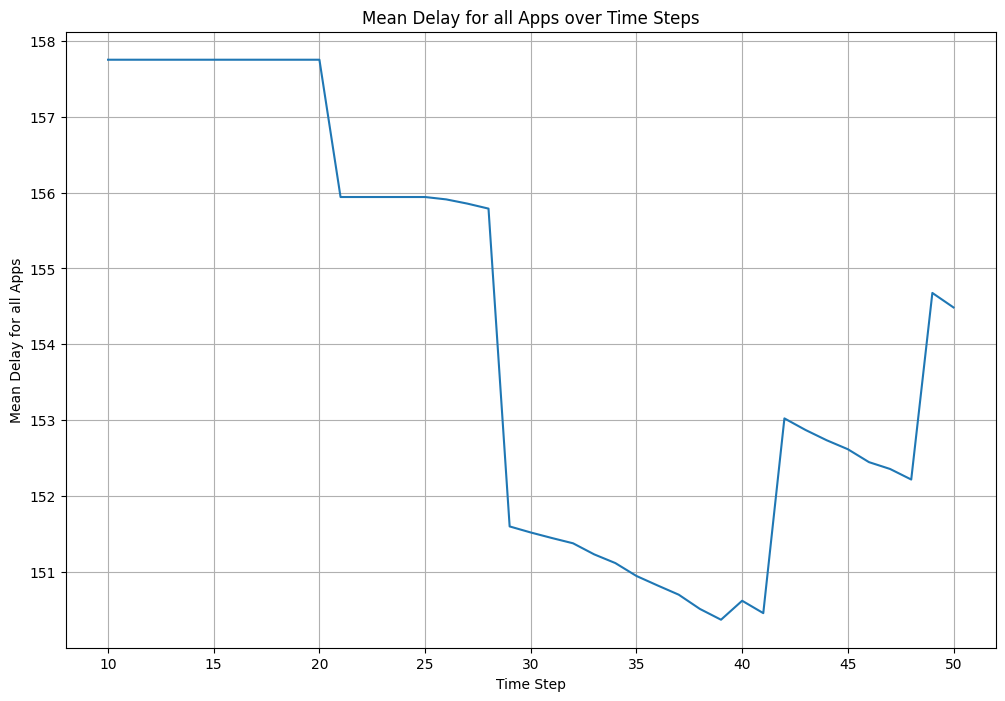

<Figure size 640x480 with 0 Axes>

In [12]:
def mean_delay_for_all_keys(delays: dict | str) -> float:
    if isinstance(delays, str):
        delays = delays.replace("inf", "float('inf')")  # type: ignore
        delays = eval(delays)  # type: ignore
    if len(delays) == 0 or delays is None:
        return np.nan
    return float(np.mean([delay for _, delay in delays.items()]))


df_user["DelayMean"] = df_user["Delays"].apply(mean_delay_for_all_keys)
mean_delay = df_user.groupby("Time Step")["DelayMean"].mean()


plt.figure(figsize=(12, 8))
plt.plot(mean_delay.index, mean_delay.values)
plt.xlabel("Time Step")
plt.ylabel("Mean Delay for all Apps")
plt.title("Mean Delay for all Apps over Time Steps")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/mean_delay_all_apps.png")

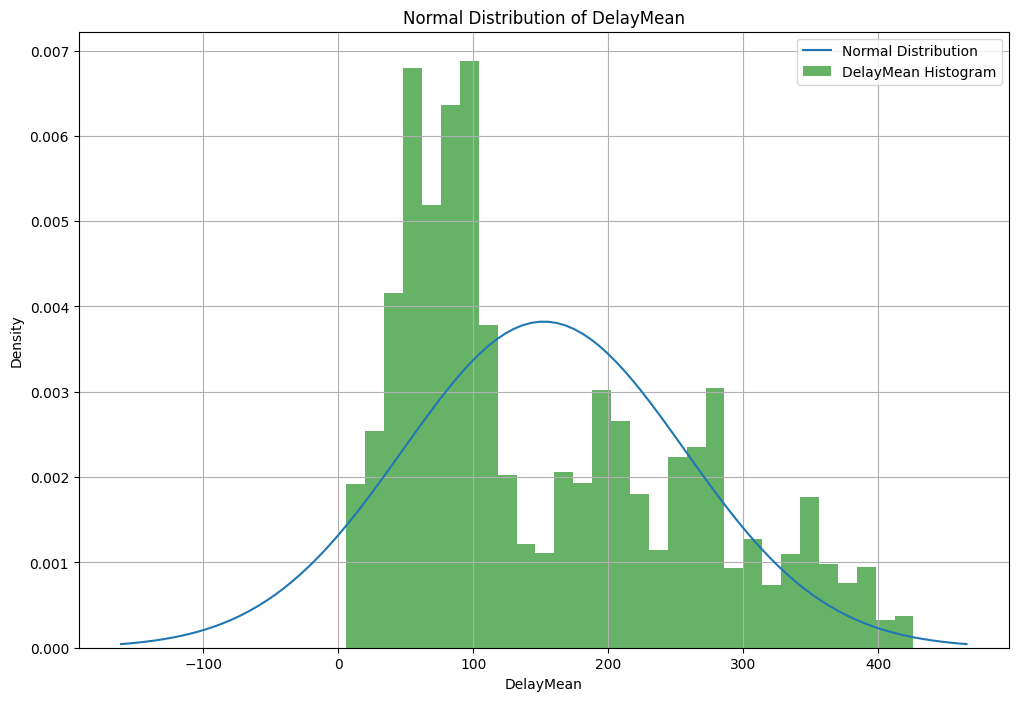

<Figure size 640x480 with 0 Axes>

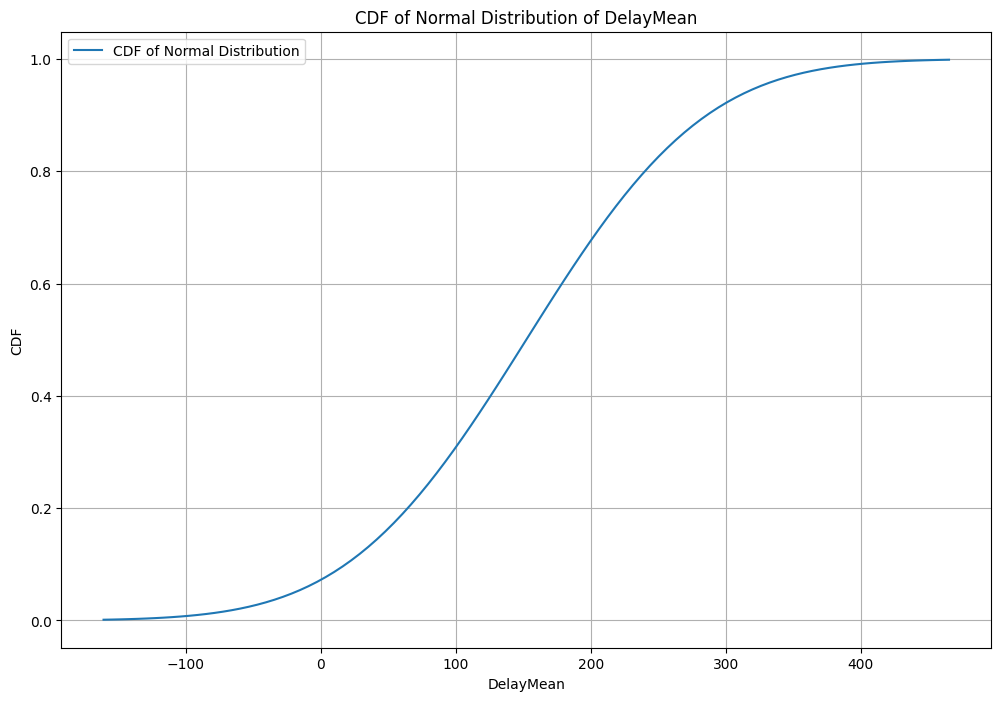

<Figure size 640x480 with 0 Axes>

In [ ]:
from scipy.special import erf

mean_user_delays = df_user["Delays"].apply(mean_delay_for_all_keys).replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(12, 8))
mean = mean_user_delays.mean()
std = mean_user_delays.std()
x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
plt.plot(x, (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2), label="Normal Distribution")
plt.hist(mean_user_delays, bins=30, density=True, alpha=0.6, color="g", label="DelayMean Histogram")
plt.xlabel("DelayMean")
plt.ylabel("Density")
plt.title("Normal Distribution of DelayMean")
plt.legend()
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/normal_distribution_delay_mean.png")

cdf = (1 + erf((x - mean) / (std * np.sqrt(2)))) / 2

plt.figure(figsize=(12, 8))
plt.plot(x, cdf, label="CDF of Normal Distribution")
plt.xlabel("DelayMean")
plt.ylabel("CDF")
plt.title("CDF of Normal Distribution of DelayMean")
plt.legend()
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/cdf_normal_distribution_delay_mean.png")

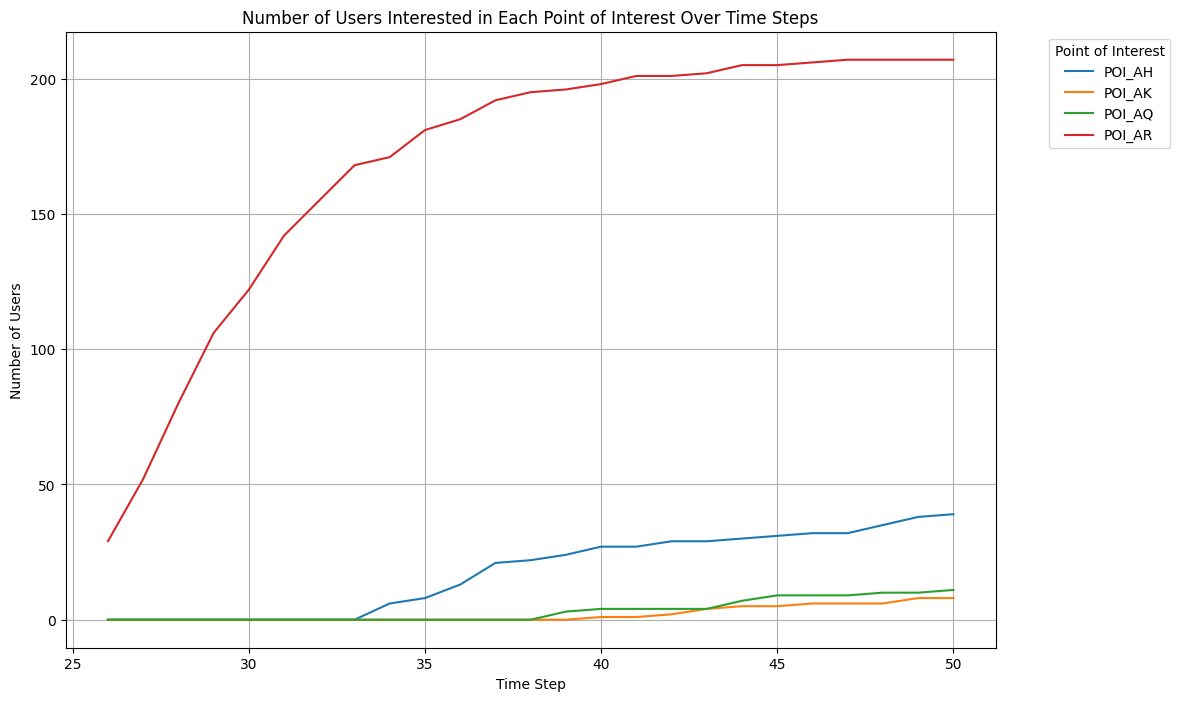

<Figure size 640x480 with 0 Axes>

In [ ]:
# Group by "Time Step" and "Point of Interest" and count the number of users
poi_counts = df_user.groupby(["Time Step", "Point of Interest"]).size().unstack(fill_value=0)

# Plot the number of users interested in each "Point of Interest" over "Time Step"
plt.figure(figsize=(12, 8))
for poi in poi_counts.columns:
    plt.plot(poi_counts.index, poi_counts[poi], label=poi)

plt.xlabel("Time Step")
plt.ylabel("Number of Users")
plt.title("Number of Users Interested in Each Point of Interest Over Time Steps")
plt.legend(title="Point of Interest", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show() if SHOW_PLOTS else None
plt.savefig(f"{PLOTS_DIR}/number_of_users_interested_in_each_poi.png")

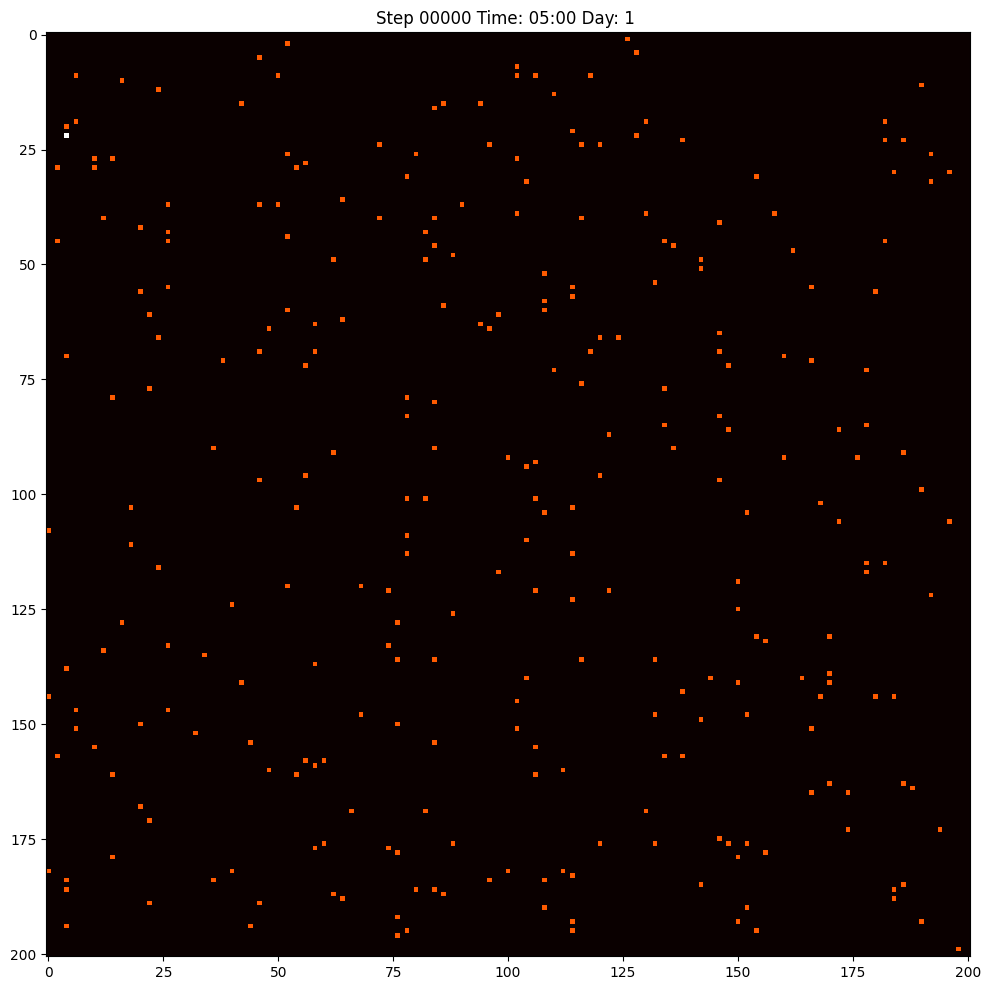

In [ ]:
# Extract coordinates and time steps
coordinates = df_user["Coordinates"]
time_steps = df_user["Time Step"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Initialize the heatmap
heatmap = ax.imshow(np.zeros((200, 200)), cmap="hot", interpolation="nearest")


def rounded_coordinates(coordinates: tuple[int, int], max=200) -> list[int]:
    rounded_coordinates: list[int] = [round(coordinates[0]), round(coordinates[1])]
    if rounded_coordinates[1] % 2 != 0 and rounded_coordinates[0] % 2 == 0:
        rounded_coordinates = [rounded_coordinates[0] + 1, rounded_coordinates[1]]
    elif rounded_coordinates[1] % 2 == 0 and rounded_coordinates[0] % 2 != 0:
        rounded_coordinates = [rounded_coordinates[0] + 1, rounded_coordinates[1]]
    return rounded_coordinates


def update(frame):
    # Clear the previous heatmap
    ax.clear()

    # Filter coordinates for the current time step
    current_coords = coordinates[time_steps == frame]

    # Create a heatmap array
    heatmap_array = np.zeros((201, 201))
    for coord in current_coords:
        coord = rounded_coordinates(coord)
        heatmap_array[coord[0], coord[1] * 2] += 1

    # Update the heatmap
    heatmap = ax.imshow(heatmap_array, cmap="hot", interpolation="nearest")
    ax.set_title(step_to_datetime(frame))
    return (heatmap,)


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(time_steps.min(), time_steps.max() + 1), blit=True)

# Display the animation
plt.show() if SHOW_PLOTS else None
ani.save(f"{PLOTS_DIR}/user_heatmap.mov", writer="ffmpeg", fps=30)

In [16]:
df_poi = pd.read_csv(f"{LOGS_DIR}/PointOfInterest.csv")
df_poi["Coordinates"] = df_poi["Coordinates"].apply(ast.literal_eval)
df_poi

,Object,Time Step,Name,Peak Start,Peak End,Coordinates,Is in peak,Percentage of peak time,Users interested
0,PointOfInterest_1,0,POI_AA,857.513543,1212.823037,"[64, 86]",False,0.0%,[]
1,PointOfInterest_2,0,POI_AB,789.170992,1034.652222,"[56, 6]",False,0.0%,[]
2,PointOfInterest_3,0,POI_AC,471.130499,622.206920,"[168, 36]",False,0.0%,[]
3,PointOfInterest_4,0,POI_AD,524.558808,701.902458,"[99, 61]",False,0.0%,[]
4,PointOfInterest_5,0,POI_AE,967.149558,1141.146430,"[75, 95]",False,0.0%,[]
...,...,...,...,...,...,...,...,...,...
1525,PointOfInterest_26,50,POI_AZ,988.045698,1143.570211,"[59, 77]",False,0.0%,[]
1526,PointOfInterest_27,50,POI_BA,818.540432,1111.595699,"[98, 86]",False,0.0%,[]
1527,PointOfInterest_28,50,POI_BB,874.371028,1176.140421,"[42, 78]",False,0.0%,[]
1528,PointOfInterest_29,50,POI_BC,646.172323,938.602340,"[182, 86]",False,0.0%,[]


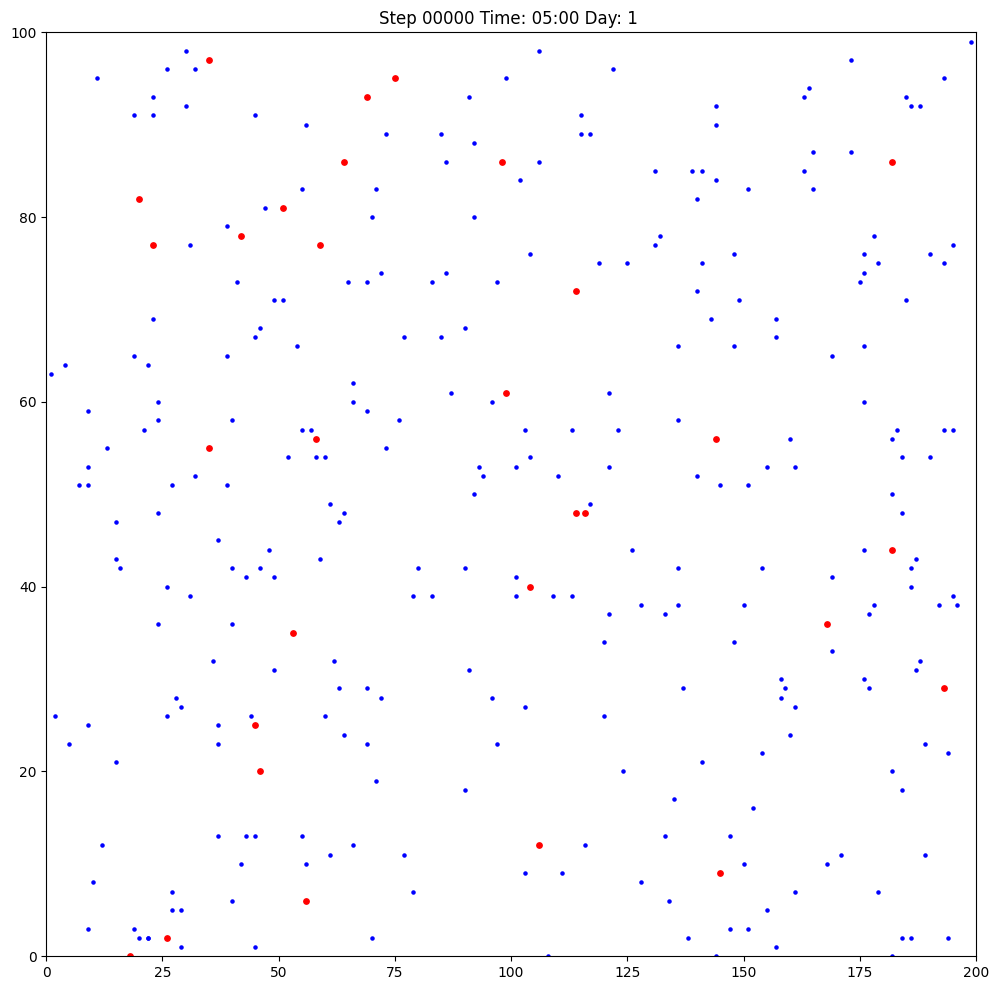

In [ ]:
df_poi_inactive = df_poi[df_poi["Is in peak"] == False]  # noqa: E712
df_poi_active = df_poi[df_poi["Is in peak"] == True]  # noqa: E712


# Extract unique time steps
unique_time_steps = df_user["Time Step"].unique()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Initialize the scatter plot
scatter_user = ax.scatter([], [], c="blue", s=5, label="User")
scatter_poi_inactive = ax.scatter([], [], c="red", s=15, label="Point of Interest (Inactive)")
scatter_poi_active = ax.scatter([], [], c="green", s=15, label="Point of Interest (Active)")

# Set axis limits
ax.set_xlim(0, 200)
ax.set_ylim(0, 100)


def update(frame):
    # Filter coordinates for the current time step
    current_coords_user = df_user[df_user["Time Step"] == frame]["Coordinates"].tolist()
    current_coords_poi_inactive = df_poi_inactive[df_poi_inactive["Time Step"] == frame]["Coordinates"].tolist()
    current_coords_poi_active = df_poi_active[df_poi_active["Time Step"] == frame]["Coordinates"].tolist()

    current_coords_poi_inactive = current_coords_poi_inactive if len(current_coords_poi_inactive) > 0 else [[-1, -1]]
    current_coords_poi_active = current_coords_poi_active if len(current_coords_poi_active) > 0 else [[-1, -1]]

    # Update scatter plot data
    scatter_user.set_offsets(current_coords_user)
    scatter_poi_inactive.set_offsets(current_coords_poi_inactive)
    scatter_poi_active.set_offsets(current_coords_poi_active)

    ax.set_title(step_to_datetime(frame))

    return (scatter_user, scatter_poi_inactive, scatter_poi_active)


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=unique_time_steps, blit=True)

# Display the animation
plt.show() if SHOW_PLOTS else None
ani.save(f"{PLOTS_DIR}/user_coordinates.mov", writer="ffmpeg", fps=30)